## 2. Exploratory Data Analysis
### Comprehensive Statistical & Visual Analysis
#### By: Keyshia Mideva

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
from scipy.stats import norm, skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Set up plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('whitegrid')

In [17]:
# 1. LOAD CLEANED DATA
print("1. LOADING CLEANED DATA")

try:
    df = pd.read_csv('../data/transformed/cleaned_retail_data.csv')
    rfm_df = pd.read_csv('../data/transformed/customer_rfm_data.csv')
    print(f" Data loaded successfully")
    print(f"   - Transactions: {len(df):,}")
    print(f"   - Customers: {len(rfm_df):,}")
except FileNotFoundError:
    print(" Cleaned data not found. Please run 1_extract_transform.ipynb first")
    raise

# Convert date columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print("\n Dataset Overview:")
df.info()

1. LOADING CLEANED DATA
 Data loaded successfully
   - Transactions: 779,425
   - Customers: 5,878

 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779425 entries, 0 to 779424
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice           779425 non-null  int64         
 1   StockCode         779425 non-null  object        
 2   Description       779425 non-null  object        
 3   Quantity          779425 non-null  int64         
 4   InvoiceDate       779425 non-null  datetime64[ns]
 5   Price             779425 non-null  float64       
 6   Customer ID       779425 non-null  float64       
 7   Country           779425 non-null  object        
 8   TotalAmount       779425 non-null  float64       
 9   InvoiceYear       779425 non-null  int64         
 10  InvoiceMonth      779425 non-null  int64         
 11  InvoiceDay        779425 non-null  int64         


In [18]:
# 2. BASIC STATISTICAL ANALYSIS
print("2.  BASIC STATISTICAL ANALYSIS")

# Numerical columns summary
numerical_cols = ['Quantity', 'Price', 'TotalAmount']
print("Descriptive Statistics:")
stats_summary = df[numerical_cols].describe()
stats_summary.loc['skewness'] = df[numerical_cols].skew()
stats_summary.loc['kurtosis'] = df[numerical_cols].kurtosis()
stats_summary

2.  BASIC STATISTICAL ANALYSIS
Descriptive Statistics:


,Quantity,Price,TotalAmount
count,779425.000000,779425.000000,779425.000000
mean,13.489370,3.218488,22.291823
std,145.855814,29.676140,227.427075
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.480000
75%,12.000000,3.750000,19.800000
max,80995.000000,10953.500000,168469.600000
skewness,401.117592,240.546429,579.574978
kurtosis,208835.588829,71987.189638,404279.970678


In [19]:
# 3. REVENUE ANALYSIS
print("3. REVENUE ANALYSIS")

# Total revenue metrics
total_revenue = df['TotalAmount'].sum()
avg_transaction_value = df['TotalAmount'].mean()
avg_order_quantity = df['Quantity'].mean()

revenue_stats = {
    'Total Revenue': f"${total_revenue:,.2f}",
    'Average Transaction Value': f"${avg_transaction_value:.2f}",
    'Average Order Quantity': f"{avg_order_quantity:.1f} units",
    'Total Transactions': f"{len(df):,}",
    'Unique Products': f"{df['StockCode'].nunique():,}",
    'Unique Customers': f"{df['Customer ID'].nunique():,}"
}

print("Revenue Statistics:")
for key, value in revenue_stats.items():
    print(f"   {key}: {value}")

3. REVENUE ANALYSIS
Revenue Statistics:
   Total Revenue: $17,374,804.27
   Average Transaction Value: $22.29
   Average Order Quantity: 13.5 units
   Total Transactions: 779,425
   Unique Products: 4,631
   Unique Customers: 5,878


4. TEMPORAL ANALYSIS


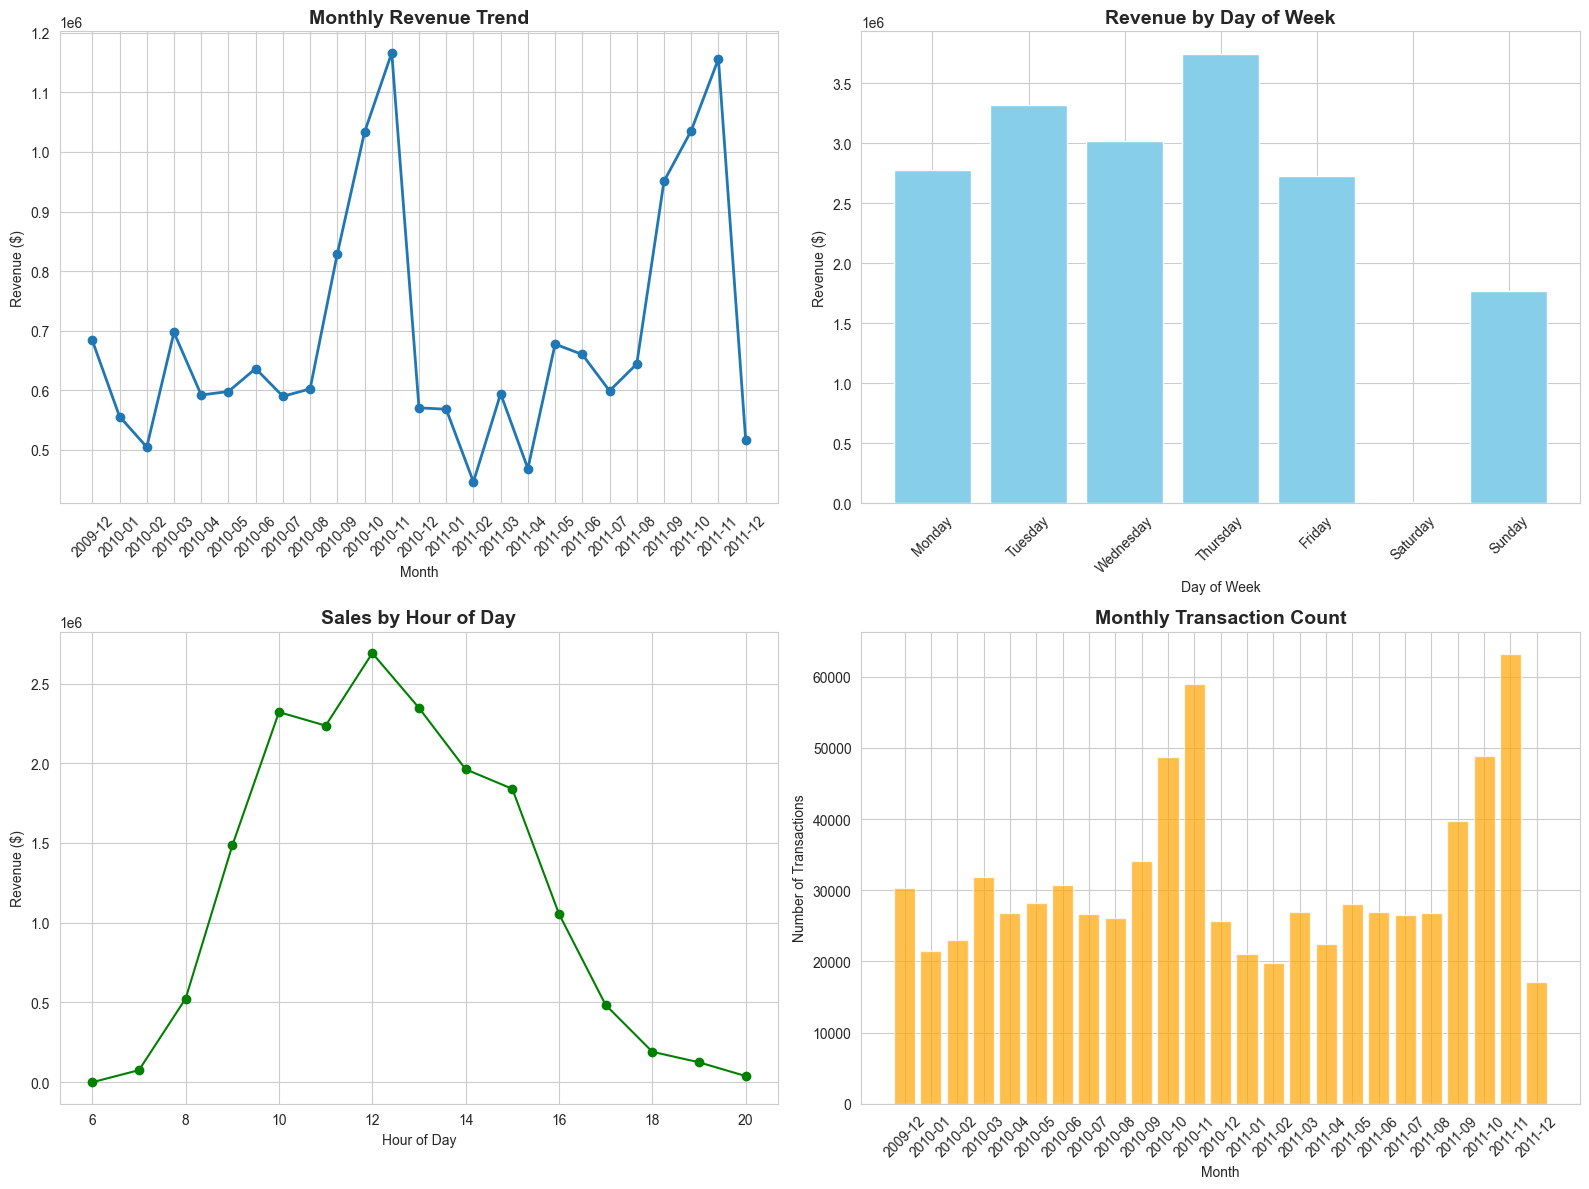

In [20]:
# 4. TEMPORAL ANALYSIS
print("4. TEMPORAL ANALYSIS")

# Revenue by month
monthly_revenue = df.groupby('YearMonth')['TotalAmount'].agg(['sum', 'count']).reset_index()
monthly_revenue.columns = ['YearMonth', 'MonthlyRevenue', 'TransactionCount']
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)

# Create temporal visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Monthly revenue trend
axes[0,0].plot(monthly_revenue['YearMonth'], monthly_revenue['MonthlyRevenue'], marker='o', linewidth=2)
axes[0,0].set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Daily revenue pattern
daily_revenue = df.groupby('InvoiceDayOfWeek')['TotalAmount'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
axes[0,1].bar(daily_revenue.index, daily_revenue.values, color='skyblue')
axes[0,1].set_title('Revenue by Day of Week', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Revenue ($)')
axes[0,1].tick_params(axis='x', rotation=45)

# Hourly sales pattern
hourly_sales = df.groupby('InvoiceHour')['TotalAmount'].sum()
axes[1,0].plot(hourly_sales.index, hourly_sales.values, marker='o', color='green')
axes[1,0].set_title('Sales by Hour of Day', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Revenue ($)')
axes[1,0].grid(True)

# Monthly transaction count
axes[1,1].bar(monthly_revenue['YearMonth'], monthly_revenue['TransactionCount'], color='orange', alpha=0.7)
axes[1,1].set_title('Monthly Transaction Count', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Number of Transactions')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [21]:
# 5. CUSTOMER BEHAVIOR ANALYSIS
print("5.  CUSTOMER BEHAVIOR ANALYSIS")

# Customer segmentation analysis
customer_summary = df.groupby('Customer ID').agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'InvoiceDate': ['min', 'max', 'nunique']
}).round(2)

customer_summary.columns = ['Total_Spent', 'Avg_Transaction', 'Transaction_Count', 
                           'Total_Items', 'First_Purchase', 'Last_Purchase', 'Unique_Visits']
customer_summary = customer_summary.reset_index()

print("Customer Behavior Summary:")
print(f"   - Average customer lifetime value: ${customer_summary['Total_Spent'].mean():.2f}")
print(f"   - Average transactions per customer: {customer_summary['Transaction_Count'].mean():.1f}")
print(f"   - Most frequent customer: {customer_summary['Transaction_Count'].max()} transactions")

5.  CUSTOMER BEHAVIOR ANALYSIS
Customer Behavior Summary:
   - Average customer lifetime value: $2955.90
   - Average transactions per customer: 132.6
   - Most frequent customer: 12435 transactions


6. PRODUCT ANALYSIS...
Top 10 Products by Revenue:
                          Description  TotalAmount  Quantity
0            REGENCY CAKESTAND 3 TIER    277656.25     24124
1  WHITE HANGING HEART T-LIGHT HOLDER    247048.01     91757
2         PAPER CRAFT , LITTLE BIRDIE    168469.60     80995
3                              Manual    151777.67      9384
4             JUMBO BAG RED RETROSPOT    134307.44     74224
5                             POSTAGE    124648.04      5235
6       ASSORTED COLOUR BIRD ORNAMENT    124351.86     78234
7                       PARTY BUNTING    103283.38     23460
8      MEDIUM CERAMIC TOP STORAGE JAR     81416.73     77916
9     PAPER CHAIN KIT 50'S CHRISTMAS      76598.18     28380


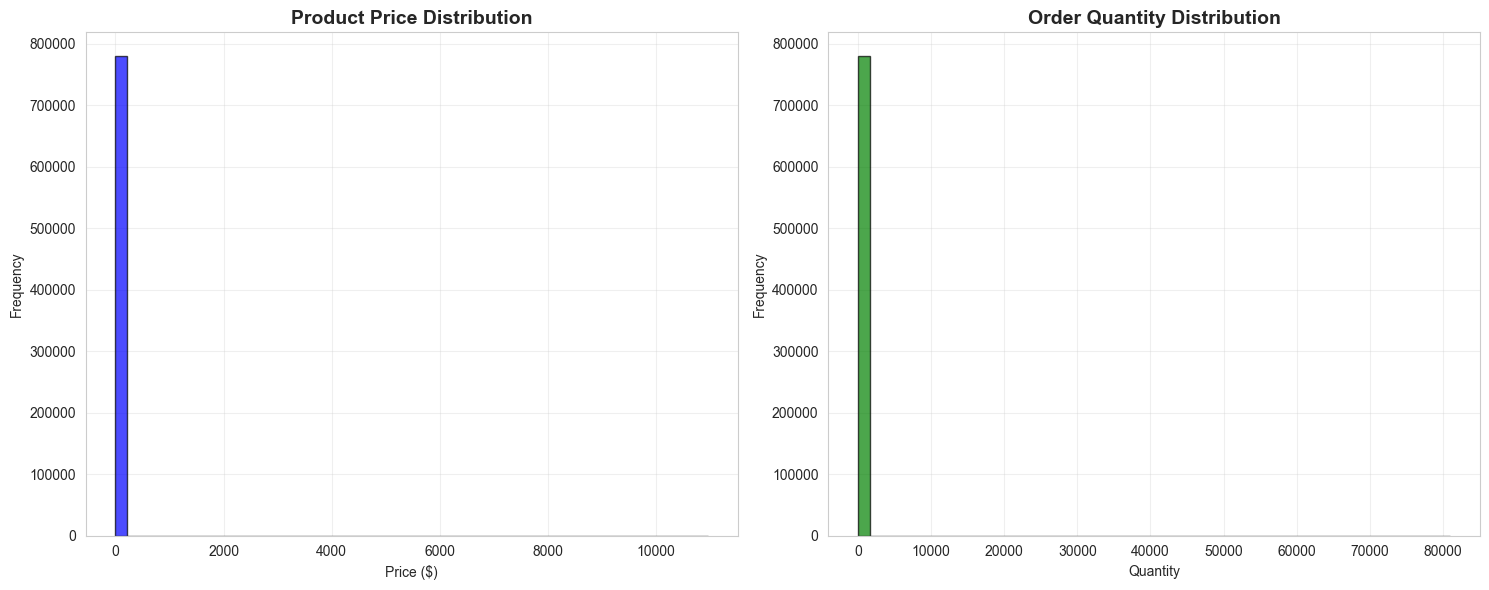

In [22]:
# 6. PRODUCT ANALYSIS
print("6. PRODUCT ANALYSIS...")

# Top products by revenue
top_products = df.groupby(['StockCode', 'Description']).agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'Invoice': 'nunique'
}).nlargest(10, 'TotalAmount').reset_index()

print("Top 10 Products by Revenue:")
print(top_products[['Description', 'TotalAmount', 'Quantity']])

# Product price distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Price distribution
axes[0].hist(df['Price'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Product Price Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Quantity distribution
axes[1].hist(df['Quantity'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Order Quantity Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# 7. GEOGRAPHICAL ANALYSIS
print("7. GEOGRAPHICAL ANALYSIS")

# Revenue by country
country_revenue = df.groupby('Country')['TotalAmount'].agg(['sum', 'count']).nlargest(10, 'sum')
country_revenue = country_revenue.reset_index()

fig = px.bar(country_revenue, x='Country', y='sum', 
             title='Top 10 Countries by Revenue',
             labels={'sum': 'Total Revenue ($)', 'Country': 'Country'},
             color='sum', color_continuous_scale='viridis')
fig.show()

print("Top 5 Countries by Revenue:")
for i, row in country_revenue.head().iterrows():
    print(f"   {row['Country']}: ${row['sum']:,.2f}")

7. GEOGRAPHICAL ANALYSIS


Top 5 Countries by Revenue:
   United Kingdom: $14,389,234.92
   EIRE: $616,570.54
   Netherlands: $554,038.09
   Germany: $425,019.71
   France: $348,768.96


8. RFM ANALYSIS VISUALIZATION


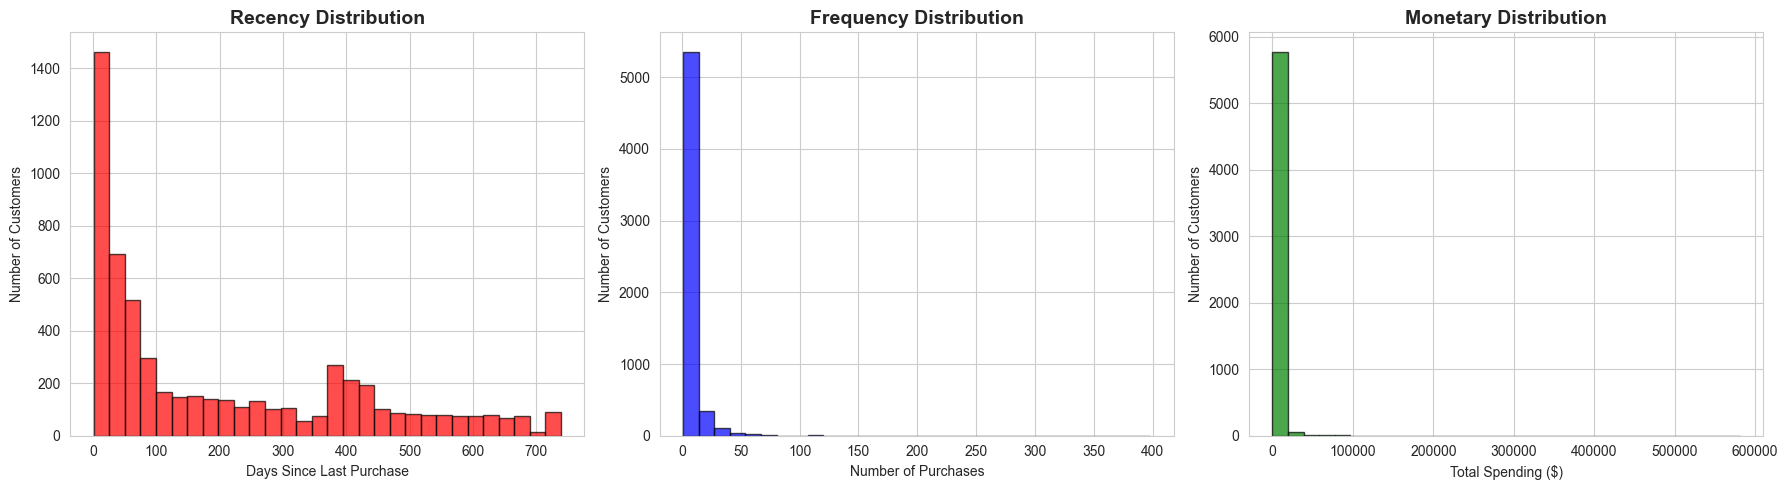

In [24]:
# 8. RFM ANALYSIS VISUALIZATION
print("8. RFM ANALYSIS VISUALIZATION")

# RFM distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency distribution
axes[0].hist(rfm_df['Recency'], bins=30, alpha=0.7, color='red', edgecolor='black')
axes[0].set_title('Recency Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Days Since Last Purchase')
axes[0].set_ylabel('Number of Customers')

# Frequency distribution
axes[1].hist(rfm_df['Frequency'], bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1].set_title('Frequency Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Purchases')
axes[1].set_ylabel('Number of Customers')

# Monetary distribution
axes[2].hist(rfm_df['Monetary'], bins=30, alpha=0.7, color='green', edgecolor='black')
axes[2].set_title('Monetary Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Total Spending ($)')
axes[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

9.  CORRELATION ANALYSIS


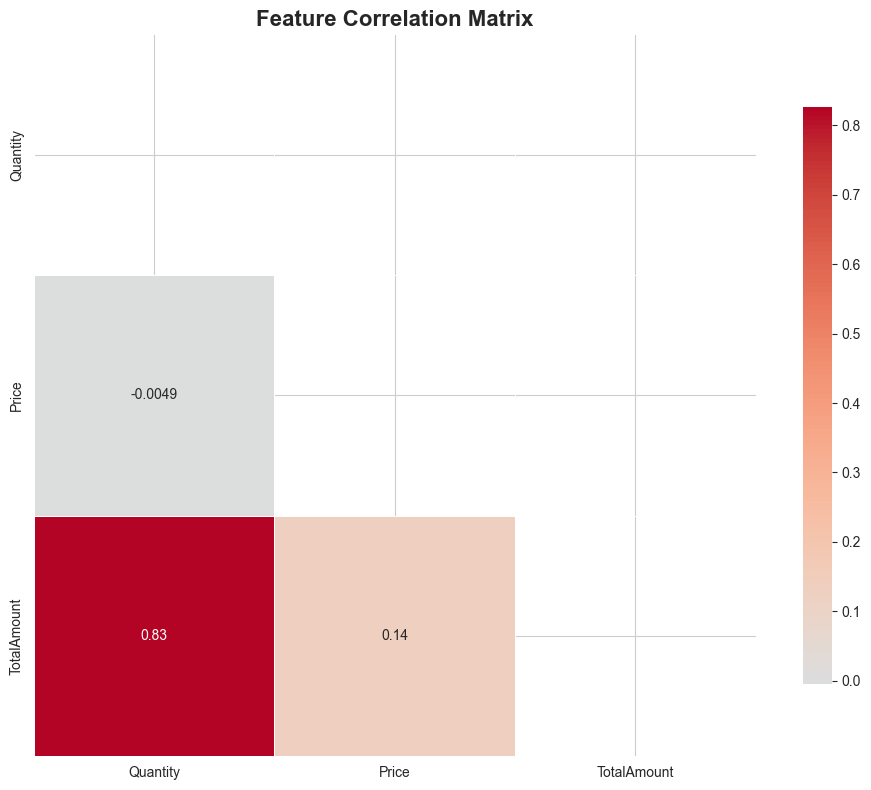

Correlation Insights:
   - Quantity vs TotalAmount: 0.827
   - Price vs TotalAmount: 0.136


In [25]:
# 9. CORRELATION ANALYSIS
print("9.  CORRELATION ANALYSIS")

# Select numerical features for correlation
corr_data = df[['Quantity', 'Price', 'TotalAmount']].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation Insights:")
print(f"   - Quantity vs TotalAmount: {corr_data.loc['Quantity', 'TotalAmount']:.3f}")
print(f"   - Price vs TotalAmount: {corr_data.loc['Price', 'TotalAmount']:.3f}")

10. OUTLIER DETECTION


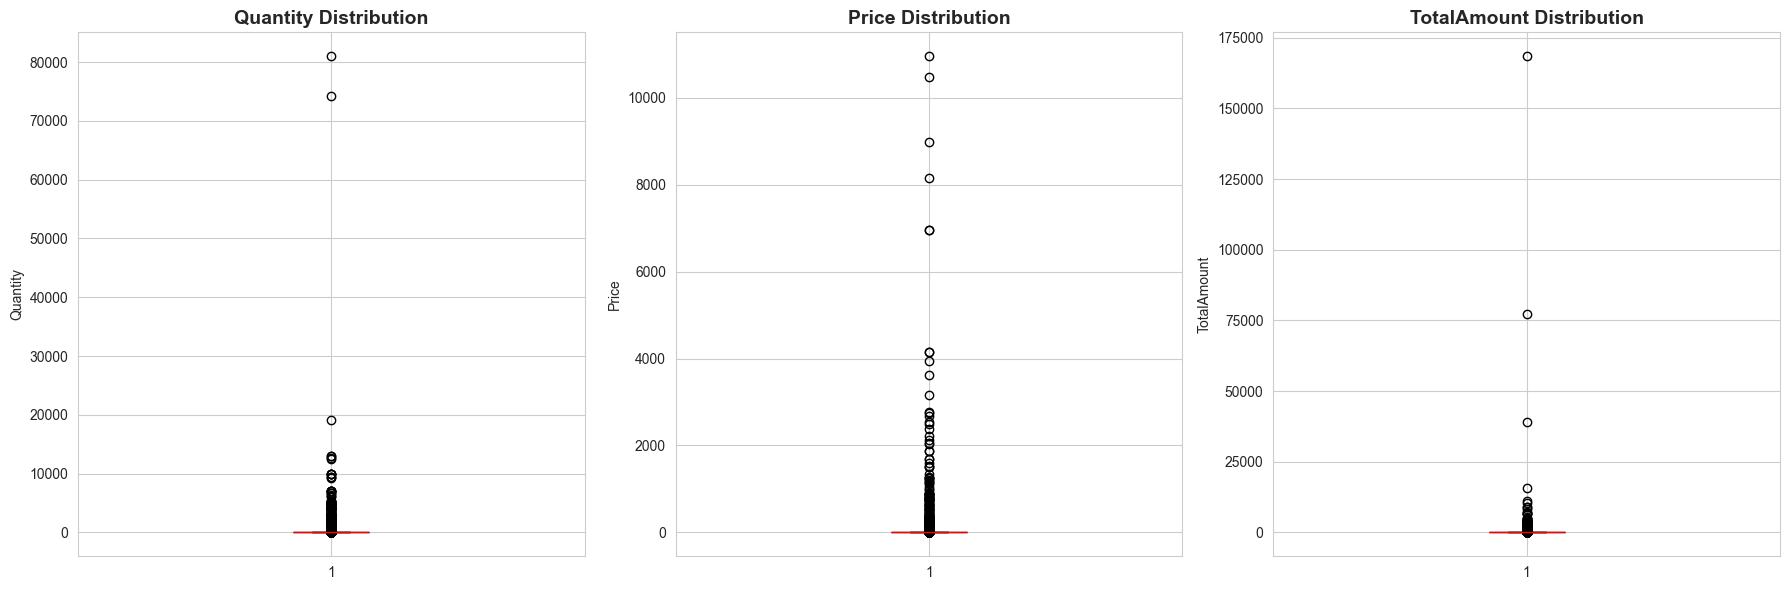

Outlier Analysis:
   - Quantity: 51119 outliers (6.6%)
   - Price: 65463 outliers (8.4%)
   - TotalAmount: 63562 outliers (8.2%)


In [26]:
# 10. OUTLIER DETECTION
print("10. OUTLIER DETECTION")

# Box plots for numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

features = ['Quantity', 'Price', 'TotalAmount']
colors = ['lightblue', 'lightgreen', 'lightcoral']

for i, feature in enumerate(features):
    axes[i].boxplot(df[feature], vert=True, patch_artist=True, 
                   boxprops=dict(facecolor=colors[i], color='black'),
                   medianprops=dict(color='red'))
    axes[i].set_title(f'{feature} Distribution', fontsize=14, fontweight='bold')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Identify outliers using IQR method
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return len(outliers)

print("Outlier Analysis:")
for feature in features:
    outlier_count = detect_outliers_iqr(df, feature)
    print(f"   - {feature}: {outlier_count} outliers ({outlier_count/len(df)*100:.1f}%)")

In [27]:
# 11. KEY FINDINGS SUMMARY
print("11. KEY EDA FINDINGS")

findings = {
    "Revenue Patterns": "Identify seasonal trends and peak sales periods",
    "Customer Segmentation": "Clear distinctions in customer spending behaviors",
    "Product Performance": "Top products contributing significantly to revenue",
    "Geographical Distribution": "Primary markets and expansion opportunities",
    "Data Quality": "Clean dataset ready for advanced mining techniques"
}

print("\n Key Insights Discovered:")
for key, value in findings.items():
    print(f"   • {key}: {value}")

print(f"\n Analysis Completed:")
print(f"   - Visualizations created: 10+ charts and graphs")
print(f"   - Statistical tests performed: Descriptive, Correlation, Outlier detection")
print(f"   - Data ready for mining")

print("\n EDA completed successfully")

11. KEY EDA FINDINGS

 Key Insights Discovered:
   • Revenue Patterns: Identify seasonal trends and peak sales periods
   • Customer Segmentation: Clear distinctions in customer spending behaviors
   • Product Performance: Top products contributing significantly to revenue
   • Geographical Distribution: Primary markets and expansion opportunities
   • Data Quality: Clean dataset ready for advanced mining techniques

 Analysis Completed:
   - Visualizations created: 10+ charts and graphs
   - Statistical tests performed: Descriptive, Correlation, Outlier detection
   - Data ready for mining

 EDA completed successfully
